# Data_Cleaning

In [59]:
import pandas as pd
import numpy as np

In [254]:
data = pd.read_csv('data/data.csv')

** id ** -Does not contain any information about the house and not needed for linking with any other tables. Will drop.

In [255]:
data.drop('id', axis=1, inplace=True)

## Null Values

**waterfront** -I reckon they'd've mentioned if a property were on the waterfront. Will replace null values with 0.0

In [256]:
data.waterfront.fillna(0.0, inplace=True)
data.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

**view** -similarly I'll replace null with 0.0

In [257]:
data.view.fillna(0.0, inplace=True)
data.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

**yr_renovated** - will replace null and 0.0 values with yr_built. Tempted to drop the column as only 744 entries will be different from yr_built, but first will see which has the better relationship with price.

In [258]:
data.yr_renovated.fillna(data.yr_built, inplace=True)
data.yr_renovated.replace(0, data.yr_built, inplace=True)

## Unusual / Placeholder Values

**date** -Change type to datetime

In [259]:
data.date = pd.to_datetime(data.date)

In [260]:
data.bedrooms.value_counts()
data[data.bedrooms == 33]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15856 2014-06-25  640000.0        33       1.75         1620      6000   

       floors  waterfront  view  condition  grade  sqft_above sqft_basement  \
15856     1.0         0.0   0.0          5      7        1040         580.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15856      1947        1947.0    98103  47.6878 -122.331           1330   

       sqft_lot15  
15856        4700

In [261]:
data[data.bedrooms == 3].describe()

price  bedrooms    bathrooms  sqft_living       sqft_lot  \
count  9.824000e+03    9824.0  9824.000000  9824.000000    9824.000000   
mean   4.662766e+05       3.0     1.968394  1805.837235   14414.790208   
std    2.626207e+05       0.0     0.629864   623.118916   35652.545246   
min    8.200000e+04       3.0     0.750000   490.000000     572.000000   
25%    2.954875e+05       3.0     1.500000  1370.000000    5000.000000   
50%    4.130000e+05       3.0     2.000000  1680.000000    7629.500000   
75%    5.600000e+05       3.0     2.500000  2110.000000   10364.000000   
max    3.800000e+06       3.0     4.500000  6400.000000  843309.000000   

            floors   waterfront         view    condition        grade  \
count  9824.000000  9824.000000  9824.000000  9824.000000  9824.000000   
mean      1.449410     0.005497     0.187704     3.415513     7.472516   
std       0.561893     0.073940     0.685199     0.640348     0.949856   
min       1.000000     0.000000     0.000000     1.000000     4.000000   
25%       1.000000     0.000000     0.000000     3.000000     7.000000   
50%       1.000000     0.000000     0.000000     3.000000     7.000000   
75%       2.000000     0.000000     0.000000     4.000000     8.000000   
max       3.500000     1.000000     4.000000     5.000000    13.000000   

        sqft_above     yr_built  yr_renovated       zipcode          lat  \
count  9824.000000  9824.000000   9824.000000   9824.000000  9824.000000   
mean   1584.442284  1971.812602   1973.522394  98076.478217    47.551478   
std     573.570701    27.222798     26.790645     53.724672     0.146264   
min     490.000000  1900.000000   1900.000000  98001.000000    47.155900   
25%    1180.000000  1955.000000   1956.000000  98031.000000    47.444275   
50%    1440.000000  1976.000000   1977.000000  98059.000000    47.565050   
75%    1830.000000  1993.000000   1994.000000  98117.000000    47.680000   
max    5480.000000  2015.000000   2015.000000  98199.000000    47.777600   

              long  sqft_living15     sqft_lot15  
count  9824.000000    9824.000000    9824.000000  
mean   -122.213344    1835.443506   12809.343648  
std       0.144433     541.362922   27249.179317  
min    -122.519000     399.000000     651.000000  
25%    -122.331000    1450.000000    5001.000000  
50%    -122.231000    1720.000000    7688.500000  
75%    -122.125000    2130.000000    9998.000000  
max    -121.315000    4950.000000  560617.000000

**bedrooms** -The 33 bedroom property is slightly smaller than the average 3 bedroom property (within a standard deviation). I suspect 33 was a typo and will change it to 3

In [262]:
data.at[15856, 'bedrooms'] = 3

**sqft_basement** -replace question marks with zero  and change column to type: int

In [263]:
data.sqft_basement.replace('?', 0, inplace=True)
data.sqft_basement = data.sqft_basement.astype('float64', copy=False).astype('int64', copy=False)

## Removing Outliers

In [264]:
data.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.371811      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.904096      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     11.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.006760      0.233181      3.409825      7.657915   
std        0.539683      0.081944      0.764673      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     285.716581   1970.999676   1972.945131  98077.951845   
std      827.759761     439.819830     29.375234     28.945393     53.513072   
min      370.000000       0.000000   1900.000000   1900.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000   1954.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000   1977.000000  98065.000000   
75%     2210.000000     550.000000   1997.000000   1999.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

Using mean +/- 2(stdev) for the columns : price, bedrooms, sqft_living, sqft_lot, sqft_above.

In [265]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [427]:
# Filter by IQR
IQR_data = data_before_std
IQR_data.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.371811      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.904096      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     11.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.006760      0.233181      3.409825      7.657915   
std        0.539683      0.081944      0.764673      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     285.716581   1970.999676   1972.945131  98077.951845   
std      827.759761     439.819830     29.375234     28.945393     53.513072   
min      370.000000       0.000000   1900.000000   1900.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000   1954.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000   1977.000000  98065.000000   
75%     2210.000000     550.000000   1997.000000   1999.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [431]:
IQR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11)
memory usage: 3.3 MB


In [432]:
lower_IQR = np.quantile(IQR_data.price, 0.25)
upper_IQR = np.quantile(IQR_data.price, 0.75)

IQR_data = IQR_data.loc[(IQR_data.price > lower_IQR) & (IQR_data.price < upper_IQR)]
IQR_data

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1     2014-12-09  538000.0         3       2.25         2570      7242   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
9     2015-03-12  323000.0         3       2.50         1890      6560   
11    2014-05-27  468000.0         2       1.00         1160      6000   
...          ...       ...       ...        ...          ...       ...   
21592 2014-05-21  360000.0         3       2.50         1530      1131   
21593 2015-02-23  400000.0         4       2.50         2310      5813   
21594 2014-06-23  402101.0         2       0.75         1020      1350   
21595 2015-01-16  400000.0         3       2.50         1600      2388   
21596 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
1         2.0         0.0   0.0          3      7        2170            400   
3         1.0         0.0   0.0          5      7        1050            910   
4         1.0         0.0   0.0          3      8        1680              0   
9         2.0         0.0   0.0          3      7        1890              0   
11        1.0         0.0   0.0          4      7         860            300   
...       ...         ...   ...        ...    ...         ...            ...   
21592     3.0         0.0   0.0          3      8        1530              0   
21593     2.0         0.0   0.0          3      8        2310              0   
21594     2.0         0.0   0.0          3      7        1020              0   
21595     2.0         0.0   0.0          3      8        1600              0   
21596     2.0         0.0   0.0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
1          1951        1991.0    98125  47.7210 -122.319           1690   
3          1965        1965.0    98136  47.5208 -122.393           1360   
4          1987        1987.0    98074  47.6168 -122.045           1800   
9          2003        2003.0    98038  47.3684 -122.031           2390   
11         1942        1942.0    98115  47.6900 -122.292           1330   
...         ...           ...      ...      ...      ...            ...   
21592      2009        2009.0    98103  47.6993 -122.346           1530   
21593      2014        2014.0    98146  47.5107 -122.362           1830   
21594      2009        2009.0    98144  47.5944 -122.299           1020   
21595      2004        2004.0    98027  47.5345 -122.069           1410   
21596      2008        2008.0    98144  47.5941 -122.299           1020   

       sqft_lot15  
1            7639  
3            5000  
4            7503  
9            7570  
11           6000  
...           ...  
21592        1509  
21593        7200  
21594        2007  
21595        1287  
21596        1357  

[10780 rows x 20 columns]

In [267]:
data_before_std = data

columns = ['price', 'bedrooms', 'sqft_living', 'sqft_lot']
for col in columns:
    mean = data[col].mean()
    std = data[col].std()
    
    data = data[abs(data[col] - mean) <= (2 * std)]        

In [268]:
data_before_std.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.371811      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.904096      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     11.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.006760      0.233181      3.409825      7.657915   
std        0.539683      0.081944      0.764673      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     285.716581   1970.999676   1972.945131  98077.951845   
std      827.759761     439.819830     29.375234     28.945393     53.513072   
min      370.000000       0.000000   1900.000000   1900.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000   1954.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000   1977.000000  98065.000000   
75%     2210.000000     550.000000   1997.000000   1999.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [269]:
data.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  1.904900e+04  19049.000000  19049.000000  19049.000000  19049.000000   
mean   4.694958e+05      3.287469      2.009804   1897.426427   9510.055698   
std    2.087372e+05      0.778822      0.661655    658.989169   9695.817328   
min    7.800000e+04      2.000000      0.500000    440.000000    520.000000   
25%    3.100000e+05      3.000000      1.500000   1390.000000   5000.000000   
50%    4.299500e+05      3.000000      2.000000   1820.000000   7350.000000   
75%    5.870000e+05      4.000000      2.500000   2350.000000   9888.000000   
max    1.270000e+06      5.000000      4.500000   3555.000000  85377.000000   

             floors    waterfront          view     condition         grade  \
count  19049.000000  19049.000000  19049.000000  19049.000000  19049.000000   
mean       1.466770      0.002835      0.161163      3.418237      7.481338   
std        0.538738      0.053169      0.622922      0.650933      0.965262   
min        1.000000      0.000000      0.000000      1.000000      4.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.000000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     11.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  19049.000000   19049.000000  19049.000000  19049.000000  19049.000000   
mean    1643.564807     248.943567   1970.172083   1971.924878  98079.674156   
std      636.062676     381.441598     29.175899     28.810199     53.731797   
min      440.000000       0.000000   1900.000000   1900.000000  98001.000000   
25%     1170.000000       0.000000   1951.000000   1953.000000  98033.000000   
50%     1490.000000       0.000000   1973.000000   1976.000000  98072.000000   
75%     2010.000000     500.000000   1995.000000   1997.000000  98118.000000   
max     3555.000000    1990.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  19049.000000  19049.000000   19049.000000   19049.000000  
mean      47.558282   -122.220217    1881.418972    9357.078324  
std        0.140295      0.137887     568.933030   12290.052769  
min       47.155900   -122.512000     399.000000     651.000000  
25%       47.463300   -122.332000    1460.000000    5000.000000  
50%       47.568600   -122.246000    1780.000000    7440.000000  
75%       47.680200   -122.135000    2230.000000    9600.000000  
max       47.777600   -121.315000    4950.000000  380279.000000

### Extra cleaning for dummying

In [41]:
data['bathroomsx4'] = data.bathrooms*4
data.bathroomsx4 = data.bathroomsx4.astype('int32')
data.drop('bathrooms', axis=1, inplace=True)

In [42]:
set(data.floors)

{1.0, 1.5, 2.0, 2.5, 3.0, 3.5}

In [43]:
data['floorsx2'] = data.floors*2
data.floorsx2 = data.floorsx2.astype('int32')
data.drop('floors', axis=1, inplace=True)

In [44]:
data = data.astype({'view':'int32','waterfront':'int32','yr_renovated':'int32'})

In [45]:
set(data.view)

{0, 1, 2, 3, 4}

In [46]:
data

date     price  bedrooms  sqft_living  sqft_lot  waterfront  view  \
0     2014-10-13  221900.0         3         1180      5650           0     0   
1     2014-12-09  538000.0         3         2570      7242           0     0   
2     2015-02-25  180000.0         2          770     10000           0     0   
3     2014-12-09  604000.0         4         1960      5000           0     0   
4     2015-02-18  510000.0         3         1680      8080           0     0   
...          ...       ...       ...          ...       ...         ...   ...   
21592 2014-05-21  360000.0         3         1530      1131           0     0   
21593 2015-02-23  400000.0         4         2310      5813           0     0   
21594 2014-06-23  402101.0         2         1020      1350           0     0   
21595 2015-01-16  400000.0         3         1600      2388           0     0   
21596 2014-10-15  325000.0         2         1020      1076           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0              3      7        1180              0      1955          1955   
1              3      7        2170            400      1951          1991   
2              3      6         770              0      1933          1933   
3              5      7        1050            910      1965          1965   
4              3      8        1680              0      1987          1987   
...          ...    ...         ...            ...       ...           ...   
21592          3      8        1530              0      2009          2009   
21593          3      8        2310              0      2014          2014   
21594          3      7        1020              0      2009          2009   
21595          3      8        1600              0      2004          2004   
21596          3      7        1020              0      2008          2008   

       zipcode      lat     long  sqft_living15  sqft_lot15  bathroomsx4  \
0        98178  47.5112 -122.257           1340        5650            4   
1        98125  47.7210 -122.319           1690        7639            9   
2        98028  47.7379 -122.233           2720        8062            4   
3        98136  47.5208 -122.393           1360        5000           12   
4        98074  47.6168 -122.045           1800        7503            8   
...        ...      ...      ...            ...         ...          ...   
21592    98103  47.6993 -122.346           1530        1509           10   
21593    98146  47.5107 -122.362           1830        7200           10   
21594    98144  47.5944 -122.299           1020        2007            3   
21595    98027  47.5345 -122.069           1410        1287           10   
21596    98144  47.5941 -122.299           1020        1357            3   

       floorsx2  
0             2  
1             4  
2             2  
3             2  
4             2  
...         ...  
21592         6  
21593         4  
21594         4  
21595         4  
21596         4  

[21597 rows x 20 columns]

In [47]:
d_in = data.drop(set(list(ind[0])))
d_in.to_csv('data\clean.csv', index=False)

# Data Analysis

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


import warnings
warnings.filterwarnings('ignore')

## Business Problem: Who are our clients, and what insignts do they need?
- Constructors: If it costs around the same money to build a feature, what feature gives the highest return on investment (ROI)? (Might need to do some outside research, but can be interesting)
- Resellers: It would be best to buy a house at a low price and sell at a higher price. So when they are looking for houses to invest in, our model can tell if a house is overpriced or underpriced.

- With the idea about making a visualization on a map - I was thinking it might be cool if we use a contour?

## More Data - GIS

In [4]:
gis = pd.read_csv('data/Parcels_for_King_County.csv')

In [5]:
gis.head()

OBJECTID SITETYPE     ZIP5        LAT         LON
0         1       R1  98107.0  47.656113 -122.358053
1         2       R1  98107.0  47.656114 -122.357894
2         3       R1  98107.0  47.656114 -122.357731
3         4       R1  98107.0  47.656015 -122.357475
4         5       R1  98107.0  47.656118 -122.357473

In [6]:
gis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623704 entries, 0 to 623703
Data columns (total 5 columns):
OBJECTID    623704 non-null int64
SITETYPE    563790 non-null object
ZIP5        563790 non-null float64
LAT         563790 non-null float64
LON         563790 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 23.8+ MB


## More Data Cleaning and EDA

It looks like 'sqft_living' = 'sqft_above' + 'sqft_basement'.
Will remove 'sqft_living' to aviod multicolinearity (perfect multicolinearlity).

In [7]:
data.drop('sqft_living', axis=1, inplace=True)

converted some columns as int types for aesthetic purposes.

In [8]:
data.price = data.price.astype('int')
data.sqft_basement = data.sqft_basement.astype('int')
data.yr_renovated = data.yr_renovated.astype('int')

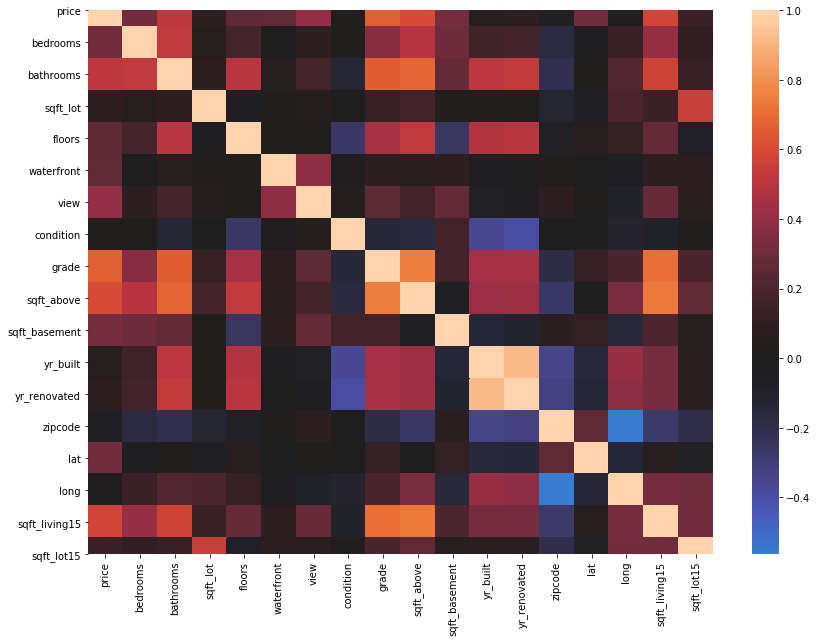

In [9]:
# Heatmap to visualize correlations between variables - refer to table in next cell if this is hard to see.
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), center=0);

In [10]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

In [11]:
df[(df.cc>.75) & (df.cc <1)]
# Variable pairs to be careful about! (again, multicolinearity)

cc
pairs                             
(yr_renovated, yr_built)  0.926466
(yr_built, yr_renovated)  0.926466
(sqft_above, grade)       0.754818
(grade, sqft_above)       0.754818

### Uncertainty in data:
- I don't know what the 'date' represents - possibly the date that this particular datapoint was recorded?
- Also not sure what the last two columns 'sqft_living15' and 'sqft_lot15' represent.
- What exactly is a quater or half bathrooms? (same question with floors)

In [12]:
data.head()

date   price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0 2014-10-13  221900         3       1.00      5650     1.0         0.0   0.0   
1 2014-12-09  538000         3       2.25      7242     2.0         0.0   0.0   
2 2015-02-25  180000         2       1.00     10000     1.0         0.0   0.0   
3 2014-12-09  604000         4       3.00      5000     1.0         0.0   0.0   
4 2015-02-18  510000         3       2.00      8080     1.0         0.0   0.0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955          1955   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933          1933   
3          5      7        1050            910      1965          1965   
4          3      8        1680              0      1987          1987   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

## Finding Correlations and making indexes

In [271]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [272]:
data_before_drop = data

In [273]:
data.drop(['sqft_living15', 'sqft_lot15', 'lat', 'long'], axis=1, inplace=True)

3    470
4     85
5     22
2      2
Name: condition, dtype: int64

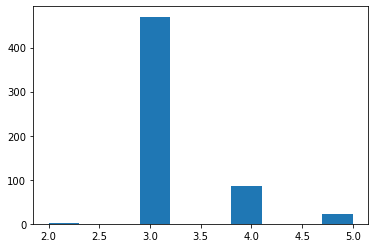

In [274]:
renovated = data[data.yr_built != data.yr_renovated]
plt.hist('condition', data=renovated)
renovated.condition.value_counts()

(array([  1.,   3.,   0.,  66.,   0., 250., 189.,   0.,  62.,   8.]),
 array([ 4. ,  4.6,  5.2,  5.8,  6.4,  7. ,  7.6,  8.2,  8.8,  9.4, 10. ]),
 <a list of 10 Patch objects>)

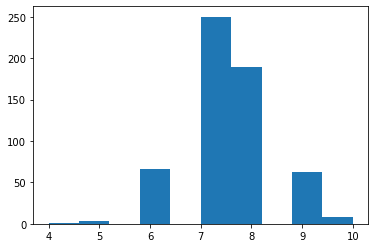

In [138]:
plt.hist('grade', data=renovated)

In [137]:
diff_years = renovated.yr_built - renovated.yr_renovated
diff_years.abs().describe()


count    579.000000
mean      57.666667
std       23.904896
min        9.000000
25%       39.000000
50%       56.000000
75%       75.500000
max      114.000000
dtype: float64

Because the data in 'yr_renovated' will be reflected in 'grade' and 'condition' - will omit this column.

In [235]:
# # reset
# data = data_with_yr_renovated

In [275]:
data_with_yr_renovated = data
data.drop('yr_renovated', axis=1, inplace=True)

omit 'sqft_living', since it is in perfect multicolinearity with 'sqft_above' and 'sqft_basement'.

In [276]:
data.drop('sqft_living', axis=1, inplace=True)

In [277]:
data.describe()

price      bedrooms     bathrooms      sqft_lot        floors  \
count  1.904900e+04  19049.000000  19049.000000  19049.000000  19049.000000   
mean   4.694958e+05      3.287469      2.009804   9510.055698      1.466770   
std    2.087372e+05      0.778822      0.661655   9695.817328      0.538738   
min    7.800000e+04      2.000000      0.500000    520.000000      1.000000   
25%    3.100000e+05      3.000000      1.500000   5000.000000      1.000000   
50%    4.299500e+05      3.000000      2.000000   7350.000000      1.000000   
75%    5.870000e+05      4.000000      2.500000   9888.000000      2.000000   
max    1.270000e+06      5.000000      4.500000  85377.000000      3.500000   

         waterfront          view     condition         grade    sqft_above  \
count  19049.000000  19049.000000  19049.000000  19049.000000  19049.000000   
mean       0.002835      0.161163      3.418237      7.481338   1643.564807   
std        0.053169      0.622922      0.650933      0.965262    636.062676   
min        0.000000      0.000000      1.000000      4.000000    440.000000   
25%        0.000000      0.000000      3.000000      7.000000   1170.000000   
50%        0.000000      0.000000      3.000000      7.000000   1490.000000   
75%        0.000000      0.000000      4.000000      8.000000   2010.000000   
max        1.000000      4.000000      5.000000     11.000000   3555.000000   

       sqft_basement      yr_built       zipcode  
count   19049.000000  19049.000000  19049.000000  
mean      248.943567   1970.172083  98079.674156  
std       381.441598     29.175899     53.731797  
min         0.000000   1900.000000  98001.000000  
25%         0.000000   1951.000000  98033.000000  
50%         0.000000   1973.000000  98072.000000  
75%       500.000000   1995.000000  98118.000000  
max      1990.000000   2015.000000  98199.000000

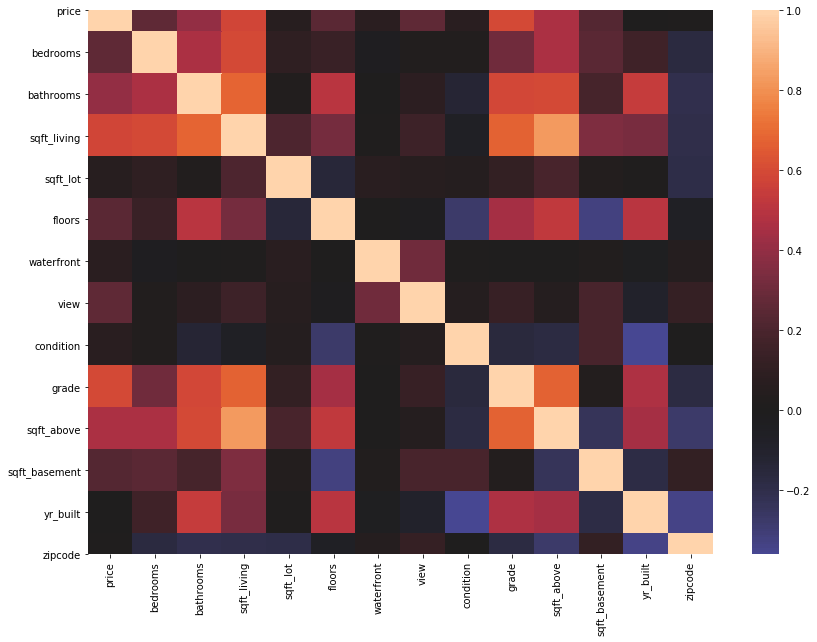

In [152]:
# Heatmap to visualize correlations between variables - refer to table in next cell if this is hard to see.
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), center=0);

In [153]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

In [157]:
df[(df.cc>.75) & (df.cc <1)]
# Variable pairs to be careful about! (again, multicolinearity)

cc
pairs                              
(sqft_living, sqft_above)  0.825066
(sqft_above, sqft_living)  0.825066

In [122]:
data.sqft_basement.describe()

count    19049.000000
mean       248.943567
std        381.441598
min          0.000000
25%          0.000000
50%          0.000000
75%        500.000000
max       1990.000000
Name: sqft_basement, dtype: float64

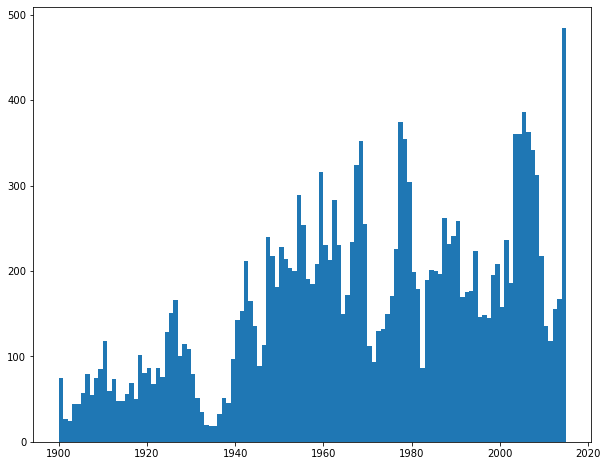

In [160]:
plt.figure(figsize=(10, 8))

plt.hist(data.yr_built, bins=2015-1900)
plt.show()

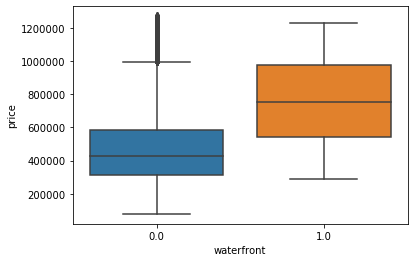

In [124]:
sns.boxplot(x="waterfront", y="price", data=data)

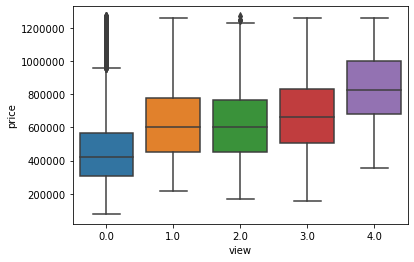

In [125]:
sns.boxplot(x="view", y="price", data=data)

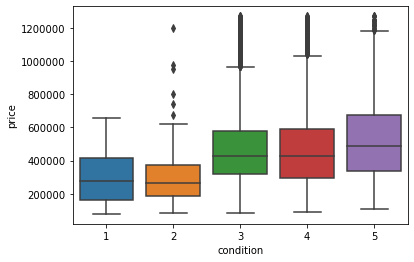

In [126]:
sns.boxplot(x="condition", y="price", data=data)

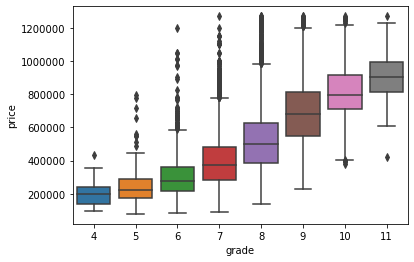

In [127]:
sns.boxplot(x="grade", y="price", data=data)

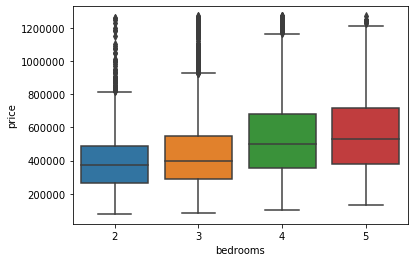

In [128]:
sns.boxplot(x="bedrooms", y="price", data=data)

also drop 'date', since it won't help with predicting the house prices.

In [278]:
data.drop('date', axis=1, inplace=True)

In [279]:
data.columns
# 1 dependent variable, 12 independent variables.

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode'],
      dtype='object')

In [280]:
data

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0      221900.0         3       1.00      5650     1.0         0.0   0.0   
1      538000.0         3       2.25      7242     2.0         0.0   0.0   
2      180000.0         2       1.00     10000     1.0         0.0   0.0   
3      604000.0         4       3.00      5000     1.0         0.0   0.0   
4      510000.0         3       2.00      8080     1.0         0.0   0.0   
...         ...       ...        ...       ...     ...         ...   ...   
21592  360000.0         3       2.50      1131     3.0         0.0   0.0   
21593  400000.0         4       2.50      5813     2.0         0.0   0.0   
21594  402101.0         2       0.75      1350     2.0         0.0   0.0   
21595  400000.0         3       2.50      2388     2.0         0.0   0.0   
21596  325000.0         2       0.75      1076     2.0         0.0   0.0   

       condition  grade  sqft_above  sqft_basement  yr_built  zipcode  
0              3      7        1180              0      1955    98178  
1              3      7        2170            400      1951    98125  
2              3      6         770              0      1933    98028  
3              5      7        1050            910      1965    98136  
4              3      8        1680              0      1987    98074  
...          ...    ...         ...            ...       ...      ...  
21592          3      8        1530              0      2009    98103  
21593          3      8        2310              0      2014    98146  
21594          3      7        1020              0      2009    98144  
21595          3      8        1600              0      2004    98027  
21596          3      7        1020              0      2008    98144  

[19049 rows x 13 columns]

# Modeling

In [404]:
# Reset
data = data_before_dummies
data

price  bedrooms  sqft_lot  waterfront  view  condition  grade  \
0      221900.0         3      5650           0     0          3      7   
1      538000.0         3      7242           0     0          3      7   
2      180000.0         2     10000           0     0          3      6   
3      604000.0         4      5000           0     0          5      7   
4      510000.0         3      8080           0     0          3      8   
...         ...       ...       ...         ...   ...        ...    ...   
21592  360000.0         3      1131           0     0          3      8   
21593  400000.0         4      5813           0     0          3      8   
21594  402101.0         2      1350           0     0          3      7   
21595  400000.0         3      2388           0     0          3      8   
21596  325000.0         2      1076           0     0          3      7   

       sqft_above  sqft_basement  yr_built  zipcode  bathroomsx4  floorsx2  
0            1180              0      1955    98178            4         2  
1            2170            400      1951    98125            9         4  
2             770              0      1933    98028            4         2  
3            1050            910      1965    98136           12         2  
4            1680              0      1987    98074            8         2  
...           ...            ...       ...      ...          ...       ...  
21592        1530              0      2009    98103           10         6  
21593        2310              0      2014    98146           10         4  
21594        1020              0      2009    98144            3         4  
21595        1600              0      2004    98027           10         4  
21596        1020              0      2008    98144            3         4  

[19049 rows x 13 columns]

In [552]:
# create csv:
data_before_dummies.to_csv('temp1.csv', index=False)

In [281]:
# data_before_dummies = data
# data_before_dummies

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0      221900.0         3       1.00      5650     1.0         0.0   0.0   
1      538000.0         3       2.25      7242     2.0         0.0   0.0   
2      180000.0         2       1.00     10000     1.0         0.0   0.0   
3      604000.0         4       3.00      5000     1.0         0.0   0.0   
4      510000.0         3       2.00      8080     1.0         0.0   0.0   
...         ...       ...        ...       ...     ...         ...   ...   
21592  360000.0         3       2.50      1131     3.0         0.0   0.0   
21593  400000.0         4       2.50      5813     2.0         0.0   0.0   
21594  402101.0         2       0.75      1350     2.0         0.0   0.0   
21595  400000.0         3       2.50      2388     2.0         0.0   0.0   
21596  325000.0         2       0.75      1076     2.0         0.0   0.0   

       condition  grade  sqft_above  sqft_basement  yr_built  zipcode  
0              3      7        1180              0      1955    98178  
1              3      7        2170            400      1951    98125  
2              3      6         770              0      1933    98028  
3              5      7        1050            910      1965    98136  
4              3      8        1680              0      1987    98074  
...          ...    ...         ...            ...       ...      ...  
21592          3      8        1530              0      2009    98103  
21593          3      8        2310              0      2014    98146  
21594          3      7        1020              0      2009    98144  
21595          3      8        1600              0      2004    98027  
21596          3      7        1020              0      2008    98144  

[19049 rows x 13 columns]

In [405]:
# waterfront_dummies = pd.get_dummies(data['waterfront'], prefix='water', drop_first=True)
zipcode_dummies = pd.get_dummies(data['zipcode'], prefix='zip', drop_first=True)

In [406]:
data = data.drop(['zipcode'], axis=1)

In [407]:
data = pd.concat([data, zipcode_dummies], axis=1)

In [408]:
data

price  bedrooms  sqft_lot  waterfront  view  condition  grade  \
0      221900.0         3      5650           0     0          3      7   
1      538000.0         3      7242           0     0          3      7   
2      180000.0         2     10000           0     0          3      6   
3      604000.0         4      5000           0     0          5      7   
4      510000.0         3      8080           0     0          3      8   
...         ...       ...       ...         ...   ...        ...    ...   
21592  360000.0         3      1131           0     0          3      8   
21593  400000.0         4      5813           0     0          3      8   
21594  402101.0         2      1350           0     0          3      7   
21595  400000.0         3      2388           0     0          3      8   
21596  325000.0         2      1076           0     0          3      7   

       sqft_above  sqft_basement  yr_built  ...  zip_98146  zip_98148  \
0            1180              0      1955  ...          0          0   
1            2170            400      1951  ...          0          0   
2             770              0      1933  ...          0          0   
3            1050            910      1965  ...          0          0   
4            1680              0      1987  ...          0          0   
...           ...            ...       ...  ...        ...        ...   
21592        1530              0      2009  ...          0          0   
21593        2310              0      2014  ...          1          0   
21594        1020              0      2009  ...          0          0   
21595        1600              0      2004  ...          0          0   
21596        1020              0      2008  ...          0          0   

       zip_98155  zip_98166  zip_98168  zip_98177  zip_98178  zip_98188  \
0              0          0          0          0          1          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
21592          0          0          0          0          0          0   
21593          0          0          0          0          0          0   
21594          0          0          0          0          0          0   
21595          0          0          0          0          0          0   
21596          0          0          0          0          0          0   

       zip_98198  zip_98199  
0              0          0  
1              0          0  
2              0          0  
3              0          0  
4              0          0  
...          ...        ...  
21592          0          0  
21593          0          0  
21594          0          0  
21595          0          0  
21596          0          0  

[19049 rows x 81 columns]

In [409]:
data.describe()

price      bedrooms      sqft_lot    waterfront          view  \
count  1.904900e+04  19049.000000  19049.000000  19049.000000  19049.000000   
mean   4.694958e+05      3.287469   9510.055698      0.002835      0.161163   
std    2.087372e+05      0.778822   9695.817328      0.053169      0.622922   
min    7.800000e+04      2.000000    520.000000      0.000000      0.000000   
25%    3.100000e+05      3.000000   5000.000000      0.000000      0.000000   
50%    4.299500e+05      3.000000   7350.000000      0.000000      0.000000   
75%    5.870000e+05      4.000000   9888.000000      0.000000      0.000000   
max    1.270000e+06      5.000000  85377.000000      1.000000      4.000000   

          condition         grade    sqft_above  sqft_basement      yr_built  \
count  19049.000000  19049.000000  19049.000000   19049.000000  19049.000000   
mean       3.418237      7.481338   1643.564807     248.943567   1970.172083   
std        0.650933      0.965262    636.062676     381.441598     29.175899   
min        1.000000      4.000000    440.000000       0.000000   1900.000000   
25%        3.000000      7.000000   1170.000000       0.000000   1951.000000   
50%        3.000000      7.000000   1490.000000       0.000000   1973.000000   
75%        4.000000      8.000000   2010.000000     500.000000   1995.000000   
max        5.000000     11.000000   3555.000000    1990.000000   2015.000000   

       ...     zip_98146     zip_98148     zip_98155     zip_98166  \
count  ...  19049.000000  19049.000000  19049.000000  19049.000000   
mean   ...      0.014226      0.002992      0.022363      0.012074   
std    ...      0.118426      0.054621      0.147866      0.109220   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

          zip_98168     zip_98177     zip_98178     zip_98188     zip_98198  \
count  19049.000000  19049.000000  19049.000000  19049.000000  19049.000000   
mean       0.013754      0.011339      0.013229      0.006772      0.014069   
std        0.116471      0.105883      0.114257      0.082015      0.117778   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          zip_98199  
count  19049.000000  
mean       0.013911  
std        0.117127  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 81 columns]

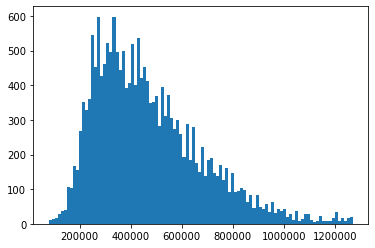

In [410]:
plt.hist('price', data=data, bins=100);

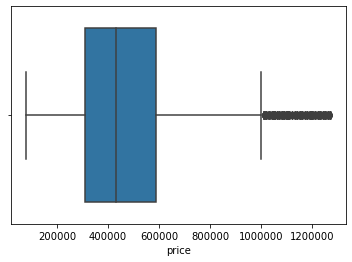

In [411]:
sns.boxplot('price', data=data);

Before doing transformations, perform the train-test split.

In [412]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

In [413]:
outcome = 'price'
x_cols = list(data.columns)
x_cols.remove(outcome)

In [414]:
# Data for the initial model
initial_data = data
initial_data

price  bedrooms  sqft_lot  waterfront  view  condition  grade  \
0      221900.0         3      5650           0     0          3      7   
1      538000.0         3      7242           0     0          3      7   
2      180000.0         2     10000           0     0          3      6   
3      604000.0         4      5000           0     0          5      7   
4      510000.0         3      8080           0     0          3      8   
...         ...       ...       ...         ...   ...        ...    ...   
21592  360000.0         3      1131           0     0          3      8   
21593  400000.0         4      5813           0     0          3      8   
21594  402101.0         2      1350           0     0          3      7   
21595  400000.0         3      2388           0     0          3      8   
21596  325000.0         2      1076           0     0          3      7   

       sqft_above  sqft_basement  yr_built  ...  zip_98146  zip_98148  \
0            1180              0      1955  ...          0          0   
1            2170            400      1951  ...          0          0   
2             770              0      1933  ...          0          0   
3            1050            910      1965  ...          0          0   
4            1680              0      1987  ...          0          0   
...           ...            ...       ...  ...        ...        ...   
21592        1530              0      2009  ...          0          0   
21593        2310              0      2014  ...          1          0   
21594        1020              0      2009  ...          0          0   
21595        1600              0      2004  ...          0          0   
21596        1020              0      2008  ...          0          0   

       zip_98155  zip_98166  zip_98168  zip_98177  zip_98178  zip_98188  \
0              0          0          0          0          1          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
21592          0          0          0          0          0          0   
21593          0          0          0          0          0          0   
21594          0          0          0          0          0          0   
21595          0          0          0          0          0          0   
21596          0          0          0          0          0          0   

       zip_98198  zip_98199  
0              0          0  
1              0          0  
2              0          0  
3              0          0  
4              0          0  
...          ...        ...  
21592          0          0  
21593          0          0  
21594          0          0  
21595          0          0  
21596          0          0  

[19049 rows x 81 columns]

In [415]:
initial_data.describe()

price      bedrooms      sqft_lot    waterfront          view  \
count  1.904900e+04  19049.000000  19049.000000  19049.000000  19049.000000   
mean   4.694958e+05      3.287469   9510.055698      0.002835      0.161163   
std    2.087372e+05      0.778822   9695.817328      0.053169      0.622922   
min    7.800000e+04      2.000000    520.000000      0.000000      0.000000   
25%    3.100000e+05      3.000000   5000.000000      0.000000      0.000000   
50%    4.299500e+05      3.000000   7350.000000      0.000000      0.000000   
75%    5.870000e+05      4.000000   9888.000000      0.000000      0.000000   
max    1.270000e+06      5.000000  85377.000000      1.000000      4.000000   

          condition         grade    sqft_above  sqft_basement      yr_built  \
count  19049.000000  19049.000000  19049.000000   19049.000000  19049.000000   
mean       3.418237      7.481338   1643.564807     248.943567   1970.172083   
std        0.650933      0.965262    636.062676     381.441598     29.175899   
min        1.000000      4.000000    440.000000       0.000000   1900.000000   
25%        3.000000      7.000000   1170.000000       0.000000   1951.000000   
50%        3.000000      7.000000   1490.000000       0.000000   1973.000000   
75%        4.000000      8.000000   2010.000000     500.000000   1995.000000   
max        5.000000     11.000000   3555.000000    1990.000000   2015.000000   

       ...     zip_98146     zip_98148     zip_98155     zip_98166  \
count  ...  19049.000000  19049.000000  19049.000000  19049.000000   
mean   ...      0.014226      0.002992      0.022363      0.012074   
std    ...      0.118426      0.054621      0.147866      0.109220   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

          zip_98168     zip_98177     zip_98178     zip_98188     zip_98198  \
count  19049.000000  19049.000000  19049.000000  19049.000000  19049.000000   
mean       0.013754      0.011339      0.013229      0.006772      0.014069   
std        0.116471      0.105883      0.114257      0.082015      0.117778   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          zip_98199  
count  19049.000000  
mean       0.013911  
std        0.117127  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 81 columns]

In [416]:
y = data[['price']]
X = data.drop(['price'], axis=1)

In [485]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [486]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     893.5
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:45:33   Log-Likelihood:            -1.9504e+05
No. Observations:               15239   AIC:                         3.903e+05
Df Residuals:                   15158   BIC:                         3.909e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       8.92e+05   8.05e+04     11.079      0.000    7.34e+05    1.05e+06
bedrooms      -4201.7682   1191.888     -3.525      0.000   -6538.013   -1865.524
sqft_lot          0.8075      0.088      9.137      0.000       0.634       0.981
waterfront     2.171e+05   1.47e+04     14.775      0.000    1.88e+05    2.46e+05
view           4.355e+04   1284.028     33.918      0.000     4.1e+04    4.61e+04
condition      2.208e+04   1238.939     17.823      0.000    1.97e+04    2.45e+04
grade          4.864e+04   1234.775     39.388      0.000    4.62e+04    5.11e+04
sqft_above      135.5493      2.214     61.221      0.000     131.209     139.889
sqft_basement    80.6467      2.625     30.728      0.000      75.502      85.791
yr_built       -654.3957     41.485    -15.774      0.000    -735.712    -573.080
bathroomsx4    4558.6853    452.289     10.079      0.000    3672.144    5445.226
floorsx2      -9040.8165   1057.623     -8.548      0.000   -1.11e+04   -6967.747
zip_98002      1599.8041   8824.064      0.181      0.856   -1.57e+04    1.89e+04
zip_98003     -6797.8075   8145.867     -0.835      0.404   -2.28e+04    9169.074
zip_98004      5.429e+05   9366.670     57.966      0.000    5.25e+05    5.61e+05
zip_98005      3.364e+05   9931.427     33.871      0.000    3.17e+05    3.56e+05
zip_98006      2.779e+05   7455.724     37.274      0.000    2.63e+05    2.93e+05
zip_98007      2.558e+05   1.06e+04     24.106      0.000    2.35e+05    2.77e+05
zip_98008      2.391e+05   8127.646     29.420      0.000    2.23e+05    2.55e+05
zip_98010      9.321e+04   1.22e+04      7.616      0.000    6.92e+04    1.17e+05
zip_98011      1.495e+05   9126.419     16.381      0.000    1.32e+05    1.67e+05
zip_98014      9.223e+04   1.27e+04      7.286      0.000    6.74e+04    1.17e+05
zip_98019      9.815e+04   9492.255     10.340      0.000    7.95e+04    1.17e+05
zip_98022     -9344.9531   9605.886     -0.973      0.331   -2.82e+04    9483.741
zip_98023     -1.807e+04   6963.198     -2.595      0.009   -3.17e+04   -4421.897
zip_98024      1.301e+05   1.58e+04      8.223      0.000    9.91e+04    1.61e+05
zip_98027      2.045e+05   7594.203     26.923      0.000     1.9e+05    2.19e+05
zip_98028      1.393e+05   8176.288     17.037      0.000    1.23e+05    1.55e+05
zip_98029      2.267e+05   7967.046     28.457      0.000    2.11e+05    2.42e+05
zip_98030      9895.4037   8114.769      1.219      0.223   -6010.520    2.58e+04
zip_98031      1.476e+04   8023.640      1.840      0.066    -962.792    3.05e+04
zip_98032       916.8512   1.04e+04      0.088      0.930   -1.95e+04    2.14e+04
zip_98033      3.316e+05   7518.232     44.106      0.000    3.17e+05    3.46e+05
zip_98034      1.896e+05   6929.107     27.356      0.000    1.76e+05    2.03e+05
zip_98038      4.233e+04   6830.339      6.197   

In [487]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [488]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [489]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 7666565002.140343
Test Mean Squarred Error: 7263477836.305378


In [490]:
train_rmse = math.sqrt(train_mse)
test_rmse = math.sqrt(test_mse)
print('Train Root Mean Squarred Error:', train_rmse)
print('Test Root Mean Squarred Error:', test_rmse)

Train Root Mean Squarred Error: 87558.92302981086
Test Root Mean Squarred Error: 85226.03966104126


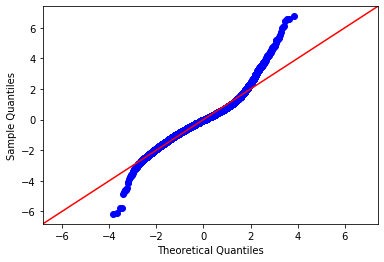

In [491]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

## Transformations

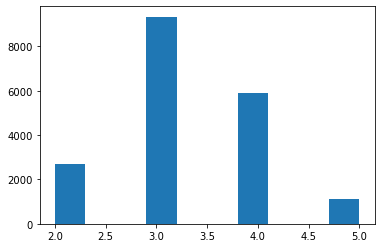

In [167]:
plt.hist('bedrooms', data=data);


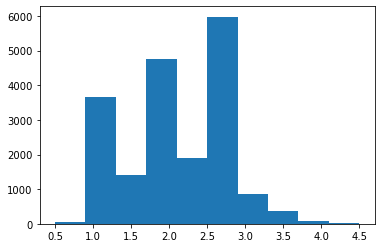

In [168]:
plt.hist('bathrooms', data=data);


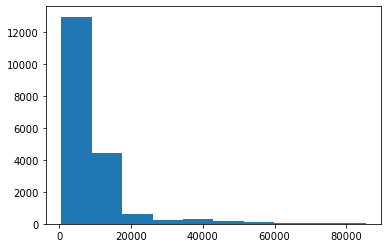

In [169]:
plt.hist('sqft_lot', data=data);
# right skewed - log transform

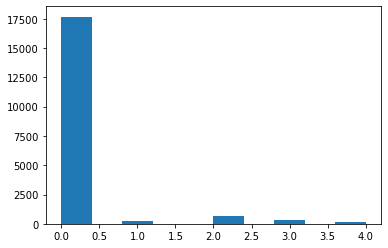

In [173]:
plt.hist('view', data=data);


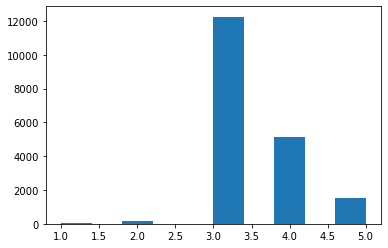

In [174]:
plt.hist('condition', data=data);


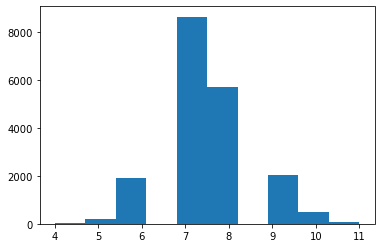

In [175]:
plt.hist('grade', data=data);


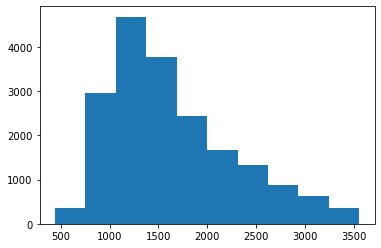

In [176]:
plt.hist('sqft_above', data=data);
# log tranform

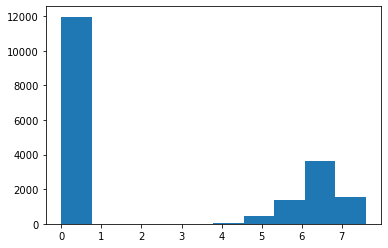

In [202]:
plt.hist('sqft_basement', data=data);
# right skewed, but those datapoints represent houses with no basements.

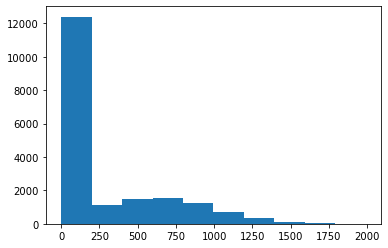

In [216]:
plt.hist('sqft_basement', data=data);
# right skewed, but those datapoints represent houses with no basements.

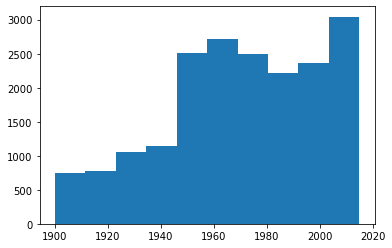

In [178]:
plt.hist('yr_built', data=data);


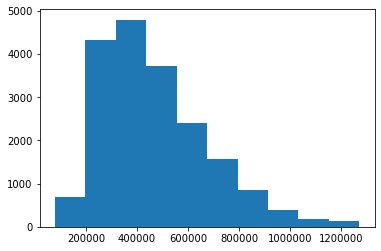

In [221]:
plt.hist('price', data=data);
# log tranform

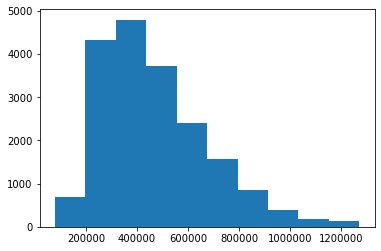

In [386]:
plt.hist('price', data=data);
# log tranform

In [321]:
categoricals = ['waterfront', 'zipcode']
log_transform = ['price', 'sqft_lot', 'sqft_above']
others = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'yr_built', 'sqft_basement']

In [519]:
# perform log transform

for feat in log_transform:
    test[feat] = test[feat].map(lambda x: np.log(x))

In [187]:
# since log(0) is undefined...
data.sqft_basement.value_counts()

-inf         11973
 6.396930      204
 6.214608      200
 6.551080      190
 6.684612      178
             ...  
 6.480045        1
 7.329750        1
 5.686975        1
 7.352441        1
 6.230481        1
Name: sqft_basement, Length: 217, dtype: int64

In [193]:
undefined = data.sqft_basement[0]  # found a undefined row, then assigned that value to a variable.
data.sqft_basement.replace(undefined, 0, inplace=True)  # replace undefined values with zeros.

In [194]:
data.sqft_basement.value_counts()

0.000000    11973
6.396930      204
6.214608      200
6.551080      190
6.684612      178
            ...  
6.480045        1
7.329750        1
5.686975        1
7.352441        1
6.230481        1
Name: sqft_basement, Length: 217, dtype: int64

In [215]:
# data['sqft_basement'] = data['sqft_basement'].map(lambda x: math.log(x, 10))
# np.log()
# np.exp()

# data[feat] = data[feat].map(lambda x: np.log(x))

# data['sqft_basement'] = data['sqft_basement'].map(lambda x: math.exp(x))

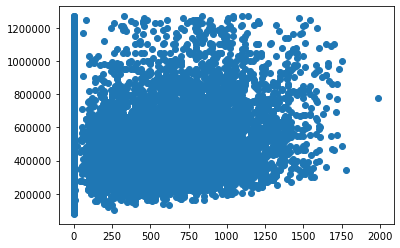

In [219]:
plt.scatter(x='sqft_basement', y='price', data=data);

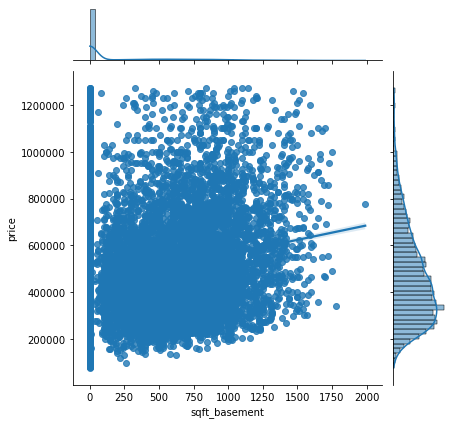

In [220]:
sns.jointplot('sqft_basement','price', data=data, kind='reg');

No strong relationship between price and sqft_basement.

In [226]:
data.sqft_basement.value_counts()

0.0      11973
600.0      204
500.0      200
700.0      190
800.0      178
         ...  
768.0        1
516.0        1
374.0        1
276.0        1
508.0        1
Name: sqft_basement, Length: 217, dtype: int64

In [210]:
data.describe()

price      bedrooms     bathrooms      sqft_lot        floors  \
count  1.904900e+04  19049.000000  19049.000000  19049.000000  19049.000000   
mean   4.694958e+05      3.287469      2.009804      8.865987      1.466770   
std    2.087372e+05      0.778822      0.661655      0.743291      0.538738   
min    7.800000e+04      2.000000      0.500000      6.253829      1.000000   
25%    3.100000e+05      3.000000      1.500000      8.517193      1.000000   
50%    4.299500e+05      3.000000      2.000000      8.902456      1.000000   
75%    5.870000e+05      4.000000      2.500000      9.199077      2.000000   
max    1.270000e+06      5.000000      4.500000     11.354832      3.500000   

         waterfront          view     condition         grade    sqft_above  \
count  19049.000000  19049.000000  19049.000000  19049.000000  19049.000000   
mean       0.002835      0.161163      3.418237      7.481338      7.333817   
std        0.053169      0.622922      0.650933      0.965262      0.374500   
min        0.000000      0.000000      1.000000      4.000000      6.086775   
25%        0.000000      0.000000      3.000000      7.000000      7.064759   
50%        0.000000      0.000000      3.000000      7.000000      7.306531   
75%        0.000000      0.000000      4.000000      8.000000      7.605890   
max        1.000000      4.000000      5.000000     11.000000      8.176110   

       sqft_basement      yr_built       zipcode  
count   1.904900e+04  19049.000000  19049.000000  
mean    1.635908e+06   1970.172083  98079.674156  
std     3.498850e+06     29.175899     53.731797  
min     1.000000e+00   1900.000000  98001.000000  
25%     1.000000e+00   1951.000000  98033.000000  
50%     1.000000e+00   1973.000000  98072.000000  
75%     1.639110e+06   1995.000000  98118.000000  
max     3.943573e+07   2015.000000  98199.000000

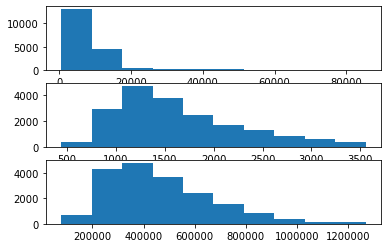

In [354]:
fig, axs = plt.subplots(3)
axs[0].hist('sqft_lot', data=data);
axs[1].hist('sqft_above', data=data);
axs[2].hist('price', data=data);

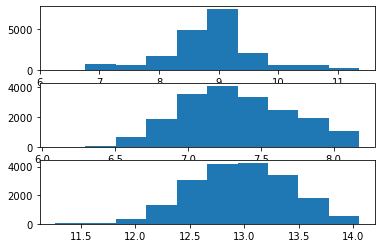

In [356]:
fig, axs = plt.subplots(3)
axs[0].hist('sqft_lot', data=data);
axs[1].hist('sqft_above', data=data);
axs[2].hist('price', data=data);

### Running after log transforms

In [510]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model1 = ols(formula=formula, data=train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1025.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:11:03   Log-Likelihood:                 4939.9
No. Observations:               15239   AIC:                            -9718.
Df Residuals:                   15158   BIC:                            -9100.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.8960      0.185     48.046      0.000       8.533       9.259
bedrooms         -0.0072      0.002     -2.999      0.003      -0.012      -0.002
sqft_lot          0.0503      0.003     16.487      0.000       0.044       0.056
waterfront        0.4169      0.029     14.196      0.000       0.359       0.474
view              0.0666      0.003     25.920      0.000       0.062       0.072
condition         0.0461      0.002     18.622      0.000       0.041       0.051
grade             0.0983      0.002     40.374      0.000       0.093       0.103
sqft_above        0.4396      0.008     55.810      0.000       0.424       0.455
sqft_basement     0.0002   5.19e-06     31.212      0.000       0.000       0.000
yr_built         -0.0005   8.56e-05     -6.180      0.000      -0.001      -0.000
bathroomsx4       0.0113      0.001     12.401      0.000       0.010       0.013
floorsx2         -0.0120      0.002     -5.356      0.000      -0.016      -0.008
zip_98002        -0.0426      0.018     -2.412      0.016      -0.077      -0.008
zip_98003         0.0013      0.016      0.077      0.939      -0.031       0.033
zip_98004         1.0730      0.019     57.302      0.000       1.036       1.110
zip_98005         0.7419      0.020     37.380      0.000       0.703       0.781
zip_98006         0.6517      0.015     43.731      0.000       0.622       0.681
zip_98007         0.6636      0.021     31.278      0.000       0.622       0.705
zip_98008         0.6408      0.016     39.399      0.000       0.609       0.673
zip_98010         0.2444      0.024      9.994      0.000       0.196       0.292
zip_98011         0.4604      0.018     25.247      0.000       0.425       0.496
zip_98014         0.2536      0.025     10.026      0.000       0.204       0.303
zip_98019         0.3272      0.019     17.248      0.000       0.290       0.364
zip_98022         0.0035      0.019      0.181      0.856      -0.034       0.041
zip_98023        -0.0272      0.014     -1.956      0.050      -0.054    5.46e-05
zip_98024         0.3714      0.032     11.753      0.000       0.309       0.433
zip_98027         0.5525      0.015     36.409      0.000       0.523       0.582
zip_98028         0.4260      0.016     26.071      0.000       0.394       0.458
zip_98029         0.6120      0.016     38.328      0.000       0.581       0.643
zip_98030         0.0480      0.016      2.961      0.003       0.016       0.080
zip_98031         0.0704      0.016      4.394      0.000       0.039       0.102
zip_98032        -0.0289      0.021     -1.384      0.166      -0.070       0.012
zip_98033         0.7744      0.015     51.519      0.000       0.745       0.804
zip_98034         0.5307      0.014     38.314      0.000       0.504       0.558
zip_98038         0.1664      0.014     12.192   

In [390]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [391]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [392]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 7666565002.140343
Test Mean Squarred Error: 7263477836.305378


In [393]:
train_rmse = math.sqrt(train_mse)
test_rmse = math.sqrt(test_mse)
print('Train Root Mean Squarred Error:', train_rmse)
print('Test Root Mean Squarred Error:', test_rmse)

Train Root Mean Squarred Error: 87558.92302981086
Test Root Mean Squarred Error: 85226.03966104126


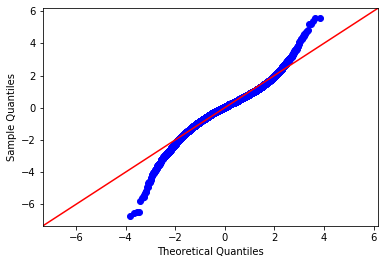

In [511]:
import scipy.stats as stats
residuals1 = model1.resid
fig = sm.graphics.qqplot(residuals1, dist=stats.norm, line='45', fit=True)

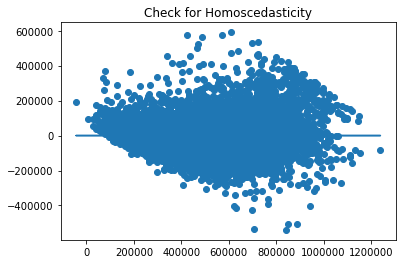

In [383]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

plt.title('Check for Homoscedasticity');

## Running after transforming only the training data

### Running after log transforms

In [493]:
y1 = train[['price']]
X1 = train.drop(['price'], axis=1)

In [509]:
train1, test1 = train_test_split(data, test_size=0.2, random_state=42)

In [508]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model1 = ols(formula=formula, data=train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1025.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:01:50   Log-Likelihood:                 4939.9
No. Observations:               15239   AIC:                            -9718.
Df Residuals:                   15158   BIC:                            -9100.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.8960      0.185     48.046      0.000       8.533       9.259
bedrooms         -0.0072      0.002     -2.999      0.003      -0.012      -0.002
sqft_lot          0.0503      0.003     16.487      0.000       0.044       0.056
waterfront        0.4169      0.029     14.196      0.000       0.359       0.474
view              0.0666      0.003     25.920      0.000       0.062       0.072
condition         0.0461      0.002     18.622      0.000       0.041       0.051
grade             0.0983      0.002     40.374      0.000       0.093       0.103
sqft_above        0.4396      0.008     55.810      0.000       0.424       0.455
sqft_basement     0.0002   5.19e-06     31.212      0.000       0.000       0.000
yr_built         -0.0005   8.56e-05     -6.180      0.000      -0.001      -0.000
bathroomsx4       0.0113      0.001     12.401      0.000       0.010       0.013
floorsx2         -0.0120      0.002     -5.356      0.000      -0.016      -0.008
zip_98002        -0.0426      0.018     -2.412      0.016      -0.077      -0.008
zip_98003         0.0013      0.016      0.077      0.939      -0.031       0.033
zip_98004         1.0730      0.019     57.302      0.000       1.036       1.110
zip_98005         0.7419      0.020     37.380      0.000       0.703       0.781
zip_98006         0.6517      0.015     43.731      0.000       0.622       0.681
zip_98007         0.6636      0.021     31.278      0.000       0.622       0.705
zip_98008         0.6408      0.016     39.399      0.000       0.609       0.673
zip_98010         0.2444      0.024      9.994      0.000       0.196       0.292
zip_98011         0.4604      0.018     25.247      0.000       0.425       0.496
zip_98014         0.2536      0.025     10.026      0.000       0.204       0.303
zip_98019         0.3272      0.019     17.248      0.000       0.290       0.364
zip_98022         0.0035      0.019      0.181      0.856      -0.034       0.041
zip_98023        -0.0272      0.014     -1.956      0.050      -0.054    5.46e-05
zip_98024         0.3714      0.032     11.753      0.000       0.309       0.433
zip_98027         0.5525      0.015     36.409      0.000       0.523       0.582
zip_98028         0.4260      0.016     26.071      0.000       0.394       0.458
zip_98029         0.6120      0.016     38.328      0.000       0.581       0.643
zip_98030         0.0480      0.016      2.961      0.003       0.016       0.080
zip_98031         0.0704      0.016      4.394      0.000       0.039       0.102
zip_98032        -0.0289      0.021     -1.384      0.166      -0.070       0.012
zip_98033         0.7744      0.015     51.519      0.000       0.745       0.804
zip_98034         0.5307      0.014     38.314      0.000       0.504       0.558
zip_98038         0.1664      0.014     12.192   

In [520]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [521]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [522]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 7666565002.140343
Test Mean Squarred Error: 7263477836.305378


In [523]:
train_rmse = math.sqrt(train_mse)
test_rmse = math.sqrt(test_mse)
print('Train Root Mean Squarred Error:', train_rmse)
print('Test Root Mean Squarred Error:', test_rmse)

Train Root Mean Squarred Error: 87558.92302981086
Test Root Mean Squarred Error: 85226.03966104126


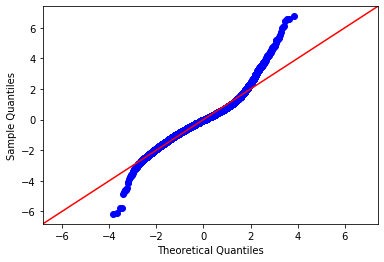

In [502]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

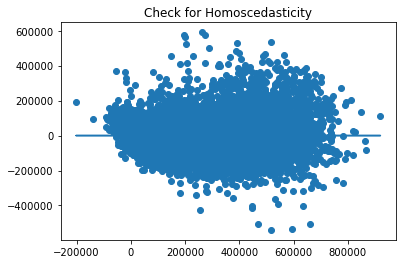

In [503]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

plt.title('Check for Homoscedasticity');

In [524]:
_y_train = train[['price']]
_X_train = train.drop(['price'], axis=1)

_y_test = test[['price']]
_X_test = test.drop(['price'], axis=1)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(_X_train, _y_train)

_y_hat_train = linreg.predict(_X_train)
_y_hat_test = linreg.predict(_X_test)

In [525]:
_train_residuals = _y_hat_train - _y_train
_test_residuals = _y_hat_test - _y_test

In [526]:
from sklearn.metrics import mean_squared_error

_train_mse = mean_squared_error(_y_train, _y_hat_train)
_test_mse = mean_squared_error(_y_test, _y_hat_test)
print('Train Mean Squarred Error:', _train_mse)
print('Test Mean Squarred Error:', _test_mse)

Train Mean Squarred Error: 0.030616792136806577
Test Mean Squarred Error: 0.02997294678940134


In [527]:
_train_rmse = math.sqrt(_train_mse)
_test_rmse = math.sqrt(_test_mse)
print('Train Root Mean Squarred Error:', _train_rmse)
print('Test Root Mean Squarred Error:', _test_rmse)

Train Root Mean Squarred Error: 0.17497654739080484
Test Root Mean Squarred Error: 0.1731269672506318


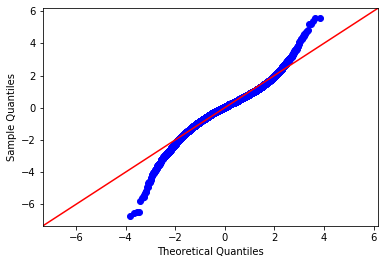

In [528]:
import scipy.stats as stats
_residuals = model1.resid
_fig = sm.graphics.qqplot(_residuals, dist=stats.norm, line='45', fit=True)

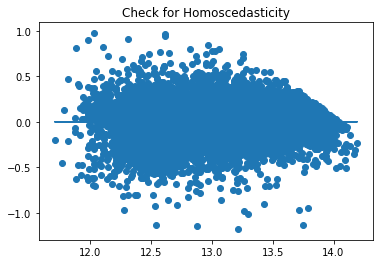

In [529]:
plt.scatter(model1.predict(train[x_cols]), model1.resid)
plt.plot(model1.predict(train[x_cols]), [0 for i in range(len(train))])

plt.title('Check for Homoscedasticity');

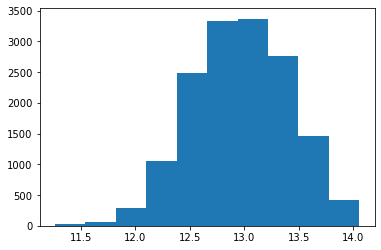

In [535]:
plt.hist(train.price);

Outlier removal for price

In [541]:
ftrain = train.loc[train.price >= 12]

In [542]:
fy = ftrain[['price']]
fX = ftrain.drop(['price'], axis=1)

In [509]:
# ftrain, ftest = train_test_split(data, test_size=0.2, random_state=42)

In [543]:
fpredictors = '+'.join(fX.columns)
fformula = outcome + '~' + fpredictors
fmodel = ols(formula=fformula, data=ftrain).fit()
fmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1026.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:39:15   Log-Likelihood:                 5600.7
No. Observations:               15036   AIC:                        -1.104e+04
Df Residuals:                   14955   BIC:                        -1.042e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.2561      0.178     52.027      0.000       8.907       9.605
bedrooms         -0.0078      0.002     -3.395      0.001      -0.012      -0.003
sqft_lot          0.0523      0.003     17.828      0.000       0.047       0.058
waterfront        0.4015      0.028     14.341      0.000       0.347       0.456
view              0.0672      0.002     27.383      0.000       0.062       0.072
condition         0.0401      0.002     16.798      0.000       0.035       0.045
grade             0.0952      0.002     40.682      0.000       0.091       0.100
sqft_above        0.4249      0.008     56.176      0.000       0.410       0.440
sqft_basement     0.0002   4.96e-06     31.215      0.000       0.000       0.000
yr_built         -0.0006   8.21e-05     -7.743      0.000      -0.001      -0.000
bathroomsx4       0.0106      0.001     12.122      0.000       0.009       0.012
floorsx2         -0.0098      0.002     -4.588      0.000      -0.014      -0.006
zip_98002        -0.0320      0.017     -1.837      0.066      -0.066       0.002
zip_98003        -0.0002      0.016     -0.011      0.991      -0.031       0.031
zip_98004         1.0635      0.018     59.307      0.000       1.028       1.099
zip_98005         0.7391      0.019     38.905      0.000       0.702       0.776
zip_98006         0.6488      0.014     45.334      0.000       0.621       0.677
zip_98007         0.6550      0.020     32.277      0.000       0.615       0.695
zip_98008         0.6319      0.016     40.507      0.000       0.601       0.662
zip_98010         0.2504      0.024     10.578      0.000       0.204       0.297
zip_98011         0.4520      0.017     25.875      0.000       0.418       0.486
zip_98014         0.2989      0.025     11.832      0.000       0.249       0.348
zip_98019         0.3172      0.018     17.467      0.000       0.282       0.353
zip_98022        -0.0070      0.018     -0.378      0.706      -0.043       0.029
zip_98023        -0.0232      0.013     -1.720      0.085      -0.050       0.003
zip_98024         0.3515      0.030     11.653      0.000       0.292       0.411
zip_98027         0.5456      0.015     37.455      0.000       0.517       0.574
zip_98028         0.4199      0.016     26.752      0.000       0.389       0.451
zip_98029         0.6061      0.015     39.569      0.000       0.576       0.636
zip_98030         0.0471      0.016      3.005      0.003       0.016       0.078
zip_98031         0.0649      0.015      4.206      0.000       0.035       0.095
zip_98032        -0.0042      0.021     -0.205      0.837      -0.045       0.036
zip_98033         0.7660      0.014     53.074      0.000       0.738       0.794
zip_98034         0.5219      0.013     39.164      0.000       0.496       0.548
zip_98038         0.1606      0.013     12.221   

In [544]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(fX, fy)

fy_hat_train = linreg.predict(fX)
fy_hat_test = linreg.predict(X_test)

In [547]:
ftrain_residuals = fy_hat_train - fy
ftest_residuals = fy_hat_test - y_test

In [550]:
from sklearn.metrics import mean_squared_error

ftrain_mse = mean_squared_error(fy, fy_hat_train)
ftest_mse = mean_squared_error(y_test, fy_hat_test)
print('Train Mean Squarred Error:', ftrain_mse)
print('Test Mean Squarred Error:', ftest_mse)

Train Mean Squarred Error: 0.027796264578956457
Test Mean Squarred Error: 259912456109.3705


In [523]:
train_rmse = math.sqrt(train_mse)
test_rmse = math.sqrt(test_mse)
print('Train Root Mean Squarred Error:', train_rmse)
print('Test Root Mean Squarred Error:', test_rmse)

Train Root Mean Squarred Error: 87558.92302981086
Test Root Mean Squarred Error: 85226.03966104126


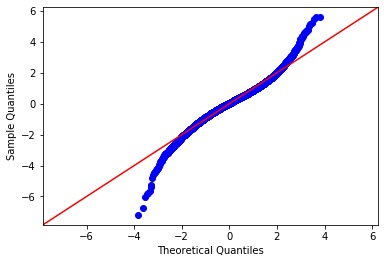

In [551]:
import scipy.stats as stats
fresiduals = fmodel.resid
fig = sm.graphics.qqplot(fresiduals, dist=stats.norm, line='45', fit=True)

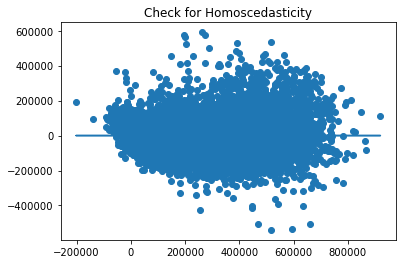

In [503]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

plt.title('Check for Homoscedasticity');

# IQR Data

In [433]:
IQR_data

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1     2014-12-09  538000.0         3       2.25         2570      7242   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
9     2015-03-12  323000.0         3       2.50         1890      6560   
11    2014-05-27  468000.0         2       1.00         1160      6000   
...          ...       ...       ...        ...          ...       ...   
21592 2014-05-21  360000.0         3       2.50         1530      1131   
21593 2015-02-23  400000.0         4       2.50         2310      5813   
21594 2014-06-23  402101.0         2       0.75         1020      1350   
21595 2015-01-16  400000.0         3       2.50         1600      2388   
21596 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
1         2.0         0.0   0.0          3      7        2170            400   
3         1.0         0.0   0.0          5      7        1050            910   
4         1.0         0.0   0.0          3      8        1680              0   
9         2.0         0.0   0.0          3      7        1890              0   
11        1.0         0.0   0.0          4      7         860            300   
...       ...         ...   ...        ...    ...         ...            ...   
21592     3.0         0.0   0.0          3      8        1530              0   
21593     2.0         0.0   0.0          3      8        2310              0   
21594     2.0         0.0   0.0          3      7        1020              0   
21595     2.0         0.0   0.0          3      8        1600              0   
21596     2.0         0.0   0.0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
1          1951        1991.0    98125  47.7210 -122.319           1690   
3          1965        1965.0    98136  47.5208 -122.393           1360   
4          1987        1987.0    98074  47.6168 -122.045           1800   
9          2003        2003.0    98038  47.3684 -122.031           2390   
11         1942        1942.0    98115  47.6900 -122.292           1330   
...         ...           ...      ...      ...      ...            ...   
21592      2009        2009.0    98103  47.6993 -122.346           1530   
21593      2014        2014.0    98146  47.5107 -122.362           1830   
21594      2009        2009.0    98144  47.5944 -122.299           1020   
21595      2004        2004.0    98027  47.5345 -122.069           1410   
21596      2008        2008.0    98144  47.5941 -122.299           1020   

       sqft_lot15  
1            7639  
3            5000  
4            7503  
9            7570  
11           6000  
...           ...  
21592        1509  
21593        7200  
21594        2007  
21595        1287  
21596        1357  

[10780 rows x 20 columns]

In [434]:
IQR_data['bathroomsx4'] = IQR_data.bathrooms*4
IQR_data.bathroomsx4 = IQR_data.bathroomsx4.astype('int32')
IQR_data.drop('bathrooms', axis=1, inplace=True)

In [435]:
IQR_data['floorsx2'] = IQR_data.floors*2
IQR_data.floorsx2 = IQR_data.floorsx2.astype('int32')
IQR_data.drop('floors', axis=1, inplace=True)

In [436]:
IQR_data = IQR_data.astype({'view':'int32','waterfront':'int32','yr_renovated':'int32'})

In [437]:
IQR_data.drop('sqft_living', axis=1, inplace=True)

converted some columns as int types for aesthetic purposes.

In [438]:
IQR_data.columns

Index(['date', 'price', 'bedrooms', 'sqft_lot', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'bathroomsx4', 'floorsx2'],
      dtype='object')

In [439]:
IQR_data.drop(['sqft_living15', 'sqft_lot15', 'lat', 'long'], axis=1, inplace=True)

Because the data in 'yr_renovated' will be reflected in 'grade' and 'condition' - will omit this column.

In [235]:
# # reset
# data = data_with_yr_renovated

In [440]:
IQR_data.drop('yr_renovated', axis=1, inplace=True)

omit 'sqft_living', since it is in perfect multicolinearity with 'sqft_above' and 'sqft_basement'.

In [442]:
IQR_data.describe()

price      bedrooms      sqft_lot    waterfront          view  \
count   10780.000000  10780.000000  1.078000e+04  10780.000000  10780.000000   
mean   461616.965863      3.314935  1.430150e+04      0.001855      0.136364   
std     89628.824135      0.869316  3.610232e+04      0.043035      0.559275   
min    322200.000000      1.000000  6.000000e+02      0.000000      0.000000   
25%    385000.000000      3.000000  4.652750e+03      0.000000      0.000000   
50%    450000.000000      3.000000  7.203000e+03      0.000000      0.000000   
75%    535000.000000      4.000000  1.009800e+04      0.000000      0.000000   
max    644500.000000     11.000000  1.074218e+06      1.000000      4.000000   

          condition         grade    sqft_above  sqft_basement      yr_built  \
count  10780.000000  10780.000000  10780.000000   10780.000000  10780.000000   
mean       3.383024      7.493321   1653.504360     269.980334   1971.964935   
std        0.624030      0.805890    628.382032     397.625977     29.594355   
min        1.000000      4.000000    410.000000       0.000000   1900.000000   
25%        3.000000      7.000000   1180.000000       0.000000   1952.000000   
50%        3.000000      7.000000   1500.000000       0.000000   1976.000000   
75%        4.000000      8.000000   2050.000000     520.000000   1999.000000   
max        5.000000     11.000000   5450.000000    2196.000000   2015.000000   

            zipcode   bathroomsx4      floorsx2  
count  10780.000000  10780.000000  10780.000000  
mean   98081.404082      8.252134      2.989147  
std       50.302997      2.599869      1.113710  
min    98001.000000      3.000000      2.000000  
25%    98034.000000      7.000000      2.000000  
50%    98074.000000      9.000000      2.000000  
75%    98118.000000     10.000000      4.000000  
max    98199.000000     30.000000      7.000000

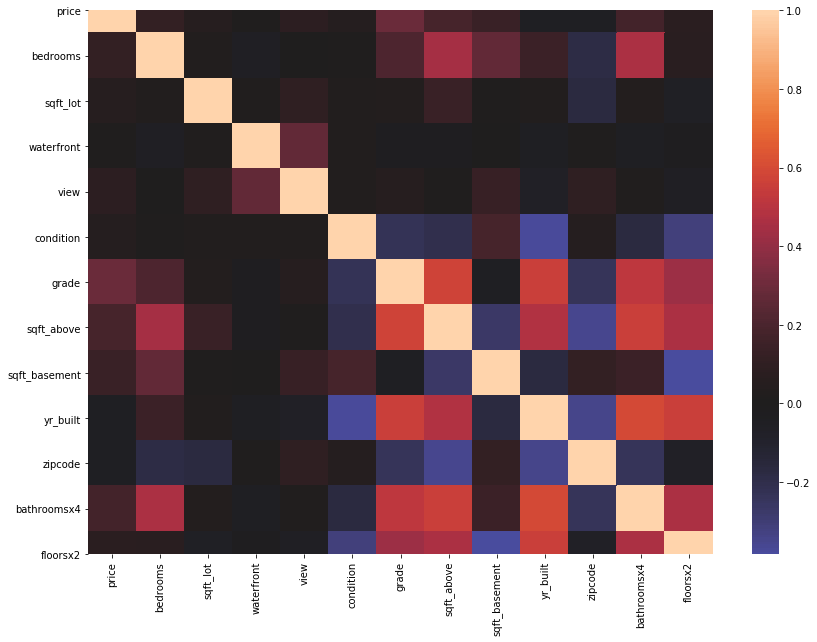

In [443]:
# Heatmap to visualize correlations between variables - refer to table in next cell if this is hard to see.
plt.figure(figsize=(14, 10))
sns.heatmap(IQR_data.corr(), center=0);

In [444]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_IQR=IQR_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_IQR['pairs'] = list(zip(df_IQR.level_0, df_IQR.level_1))

# set index to pairs
df_IQR.set_index(['pairs'], inplace = True)

#drop level columns
df_IQR.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_IQR.columns = ['cc']

In [447]:
df_IQR[(df_IQR.cc>.5) & (df_IQR.cc <1)]
# Variable pairs to be careful about! (again, multicolinearity)

cc
pairs                              
(yr_built, bathroomsx4)    0.597527
(bathroomsx4, yr_built)    0.597527
(grade, sqft_above)        0.576722
(sqft_above, grade)        0.576722
(sqft_above, bathroomsx4)  0.559991
(bathroomsx4, sqft_above)  0.559991
(floorsx2, yr_built)       0.557760
(yr_built, floorsx2)       0.557760
(yr_built, grade)          0.553385
(grade, yr_built)          0.553385
(bathroomsx4, grade)       0.514613
(grade, bathroomsx4)       0.514613

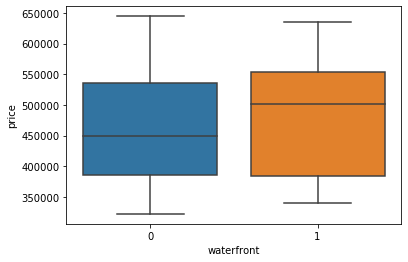

In [449]:
sns.boxplot(x="waterfront", y="price", data=IQR_data)

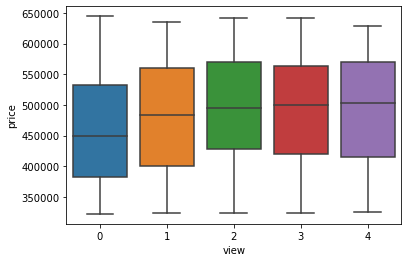

In [450]:
sns.boxplot(x="view", y="price", data=IQR_data)

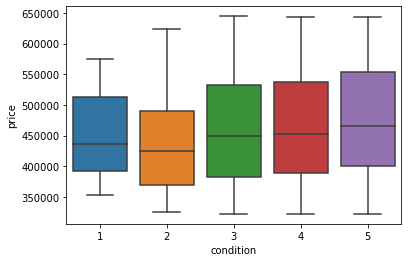

In [451]:
sns.boxplot(x="condition", y="price", data=IQR_data)

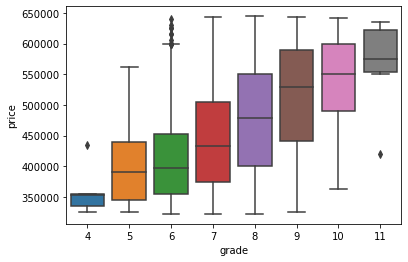

In [452]:
sns.boxplot(x="grade", y="price", data=IQR_data)

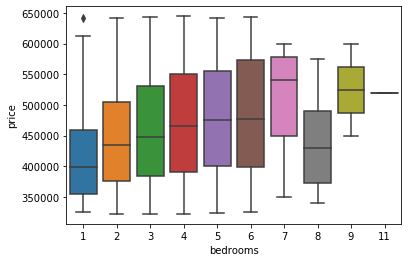

In [453]:
sns.boxplot(x="bedrooms", y="price", data=IQR_data)

also drop 'date', since it won't help with predicting the house prices.

In [454]:
IQR_data.drop('date', axis=1, inplace=True)

In [455]:
IQR_data.columns
# 1 dependent variable, 12 independent variables.

Index(['price', 'bedrooms', 'sqft_lot', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode',
       'bathroomsx4', 'floorsx2'],
      dtype='object')

In [280]:
data

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0      221900.0         3       1.00      5650     1.0         0.0   0.0   
1      538000.0         3       2.25      7242     2.0         0.0   0.0   
2      180000.0         2       1.00     10000     1.0         0.0   0.0   
3      604000.0         4       3.00      5000     1.0         0.0   0.0   
4      510000.0         3       2.00      8080     1.0         0.0   0.0   
...         ...       ...        ...       ...     ...         ...   ...   
21592  360000.0         3       2.50      1131     3.0         0.0   0.0   
21593  400000.0         4       2.50      5813     2.0         0.0   0.0   
21594  402101.0         2       0.75      1350     2.0         0.0   0.0   
21595  400000.0         3       2.50      2388     2.0         0.0   0.0   
21596  325000.0         2       0.75      1076     2.0         0.0   0.0   

       condition  grade  sqft_above  sqft_basement  yr_built  zipcode  
0              3      7        1180              0      1955    98178  
1              3      7        2170            400      1951    98125  
2              3      6         770              0      1933    98028  
3              5      7        1050            910      1965    98136  
4              3      8        1680              0      1987    98074  
...          ...    ...         ...            ...       ...      ...  
21592          3      8        1530              0      2009    98103  
21593          3      8        2310              0      2014    98146  
21594          3      7        1020              0      2009    98144  
21595          3      8        1600              0      2004    98027  
21596          3      7        1020              0      2008    98144  

[19049 rows x 13 columns]

# Modeling

In [281]:
# data_before_dummies = data
# data_before_dummies

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0      221900.0         3       1.00      5650     1.0         0.0   0.0   
1      538000.0         3       2.25      7242     2.0         0.0   0.0   
2      180000.0         2       1.00     10000     1.0         0.0   0.0   
3      604000.0         4       3.00      5000     1.0         0.0   0.0   
4      510000.0         3       2.00      8080     1.0         0.0   0.0   
...         ...       ...        ...       ...     ...         ...   ...   
21592  360000.0         3       2.50      1131     3.0         0.0   0.0   
21593  400000.0         4       2.50      5813     2.0         0.0   0.0   
21594  402101.0         2       0.75      1350     2.0         0.0   0.0   
21595  400000.0         3       2.50      2388     2.0         0.0   0.0   
21596  325000.0         2       0.75      1076     2.0         0.0   0.0   

       condition  grade  sqft_above  sqft_basement  yr_built  zipcode  
0              3      7        1180              0      1955    98178  
1              3      7        2170            400      1951    98125  
2              3      6         770              0      1933    98028  
3              5      7        1050            910      1965    98136  
4              3      8        1680              0      1987    98074  
...          ...    ...         ...            ...       ...      ...  
21592          3      8        1530              0      2009    98103  
21593          3      8        2310              0      2014    98146  
21594          3      7        1020              0      2009    98144  
21595          3      8        1600              0      2004    98027  
21596          3      7        1020              0      2008    98144  

[19049 rows x 13 columns]

In [457]:
# waterfront_dummies = pd.get_dummies(data['waterfront'], prefix='water', drop_first=True)
IQR_zipcode_dummies = pd.get_dummies(IQR_data['zipcode'], prefix='zip', drop_first=True)

In [458]:
IQR_data = IQR_data.drop(['zipcode'], axis=1)

In [459]:
IQR_data = pd.concat([IQR_data, IQR_zipcode_dummies], axis=1)

In [460]:
IQR_data

price  bedrooms  sqft_lot  waterfront  view  condition  grade  \
1      538000.0         3      7242           0     0          3      7   
3      604000.0         4      5000           0     0          5      7   
4      510000.0         3      8080           0     0          3      8   
9      323000.0         3      6560           0     0          3      7   
11     468000.0         2      6000           0     0          4      7   
...         ...       ...       ...         ...   ...        ...    ...   
21592  360000.0         3      1131           0     0          3      8   
21593  400000.0         4      5813           0     0          3      8   
21594  402101.0         2      1350           0     0          3      7   
21595  400000.0         3      2388           0     0          3      8   
21596  325000.0         2      1076           0     0          3      7   

       sqft_above  sqft_basement  yr_built  ...  zip_98146  zip_98148  \
1            2170            400      1951  ...          0          0   
3            1050            910      1965  ...          0          0   
4            1680              0      1987  ...          0          0   
9            1890              0      2003  ...          0          0   
11            860            300      1942  ...          0          0   
...           ...            ...       ...  ...        ...        ...   
21592        1530              0      2009  ...          0          0   
21593        2310              0      2014  ...          1          0   
21594        1020              0      2009  ...          0          0   
21595        1600              0      2004  ...          0          0   
21596        1020              0      2008  ...          0          0   

       zip_98155  zip_98166  zip_98168  zip_98177  zip_98178  zip_98188  \
1              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
9              0          0          0          0          0          0   
11             0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
21592          0          0          0          0          0          0   
21593          0          0          0          0          0          0   
21594          0          0          0          0          0          0   
21595          0          0          0          0          0          0   
21596          0          0          0          0          0          0   

       zip_98198  zip_98199  
1              0          0  
3              0          0  
4              0          0  
9              0          0  
11             0          0  
...          ...        ...  
21592          0          0  
21593          0          0  
21594          0          0  
21595          0          0  
21596          0          0  

[10780 rows x 80 columns]

In [409]:
data.describe()

price      bedrooms      sqft_lot    waterfront          view  \
count  1.904900e+04  19049.000000  19049.000000  19049.000000  19049.000000   
mean   4.694958e+05      3.287469   9510.055698      0.002835      0.161163   
std    2.087372e+05      0.778822   9695.817328      0.053169      0.622922   
min    7.800000e+04      2.000000    520.000000      0.000000      0.000000   
25%    3.100000e+05      3.000000   5000.000000      0.000000      0.000000   
50%    4.299500e+05      3.000000   7350.000000      0.000000      0.000000   
75%    5.870000e+05      4.000000   9888.000000      0.000000      0.000000   
max    1.270000e+06      5.000000  85377.000000      1.000000      4.000000   

          condition         grade    sqft_above  sqft_basement      yr_built  \
count  19049.000000  19049.000000  19049.000000   19049.000000  19049.000000   
mean       3.418237      7.481338   1643.564807     248.943567   1970.172083   
std        0.650933      0.965262    636.062676     381.441598     29.175899   
min        1.000000      4.000000    440.000000       0.000000   1900.000000   
25%        3.000000      7.000000   1170.000000       0.000000   1951.000000   
50%        3.000000      7.000000   1490.000000       0.000000   1973.000000   
75%        4.000000      8.000000   2010.000000     500.000000   1995.000000   
max        5.000000     11.000000   3555.000000    1990.000000   2015.000000   

       ...     zip_98146     zip_98148     zip_98155     zip_98166  \
count  ...  19049.000000  19049.000000  19049.000000  19049.000000   
mean   ...      0.014226      0.002992      0.022363      0.012074   
std    ...      0.118426      0.054621      0.147866      0.109220   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

          zip_98168     zip_98177     zip_98178     zip_98188     zip_98198  \
count  19049.000000  19049.000000  19049.000000  19049.000000  19049.000000   
mean       0.013754      0.011339      0.013229      0.006772      0.014069   
std        0.116471      0.105883      0.114257      0.082015      0.117778   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          zip_98199  
count  19049.000000  
mean       0.013911  
std        0.117127  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 81 columns]

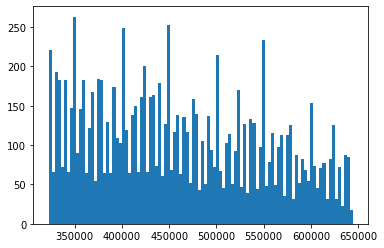

In [461]:
plt.hist('price', data=IQR_data, bins=100);

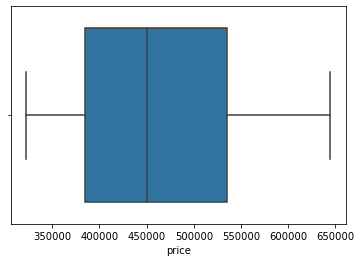

In [462]:
sns.boxplot('price', data=IQR_data);

Before doing transformations, perform the train-test split.

In [412]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

In [463]:
outcome = 'price'
IQR_x_cols = list(IQR_data.columns)
IQR_x_cols.remove(outcome)

In [464]:
# Data for the initial model
IQR_initial_data = IQR_data
IQR_initial_data

price  bedrooms  sqft_lot  waterfront  view  condition  grade  \
1      538000.0         3      7242           0     0          3      7   
3      604000.0         4      5000           0     0          5      7   
4      510000.0         3      8080           0     0          3      8   
9      323000.0         3      6560           0     0          3      7   
11     468000.0         2      6000           0     0          4      7   
...         ...       ...       ...         ...   ...        ...    ...   
21592  360000.0         3      1131           0     0          3      8   
21593  400000.0         4      5813           0     0          3      8   
21594  402101.0         2      1350           0     0          3      7   
21595  400000.0         3      2388           0     0          3      8   
21596  325000.0         2      1076           0     0          3      7   

       sqft_above  sqft_basement  yr_built  ...  zip_98146  zip_98148  \
1            2170            400      1951  ...          0          0   
3            1050            910      1965  ...          0          0   
4            1680              0      1987  ...          0          0   
9            1890              0      2003  ...          0          0   
11            860            300      1942  ...          0          0   
...           ...            ...       ...  ...        ...        ...   
21592        1530              0      2009  ...          0          0   
21593        2310              0      2014  ...          1          0   
21594        1020              0      2009  ...          0          0   
21595        1600              0      2004  ...          0          0   
21596        1020              0      2008  ...          0          0   

       zip_98155  zip_98166  zip_98168  zip_98177  zip_98178  zip_98188  \
1              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
9              0          0          0          0          0          0   
11             0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
21592          0          0          0          0          0          0   
21593          0          0          0          0          0          0   
21594          0          0          0          0          0          0   
21595          0          0          0          0          0          0   
21596          0          0          0          0          0          0   

       zip_98198  zip_98199  
1              0          0  
3              0          0  
4              0          0  
9              0          0  
11             0          0  
...          ...        ...  
21592          0          0  
21593          0          0  
21594          0          0  
21595          0          0  
21596          0          0  

[10780 rows x 80 columns]

In [465]:
IQR_initial_data.describe()

price      bedrooms      sqft_lot    waterfront          view  \
count   10780.000000  10780.000000  1.078000e+04  10780.000000  10780.000000   
mean   461616.965863      3.314935  1.430150e+04      0.001855      0.136364   
std     89628.824135      0.869316  3.610232e+04      0.043035      0.559275   
min    322200.000000      1.000000  6.000000e+02      0.000000      0.000000   
25%    385000.000000      3.000000  4.652750e+03      0.000000      0.000000   
50%    450000.000000      3.000000  7.203000e+03      0.000000      0.000000   
75%    535000.000000      4.000000  1.009800e+04      0.000000      0.000000   
max    644500.000000     11.000000  1.074218e+06      1.000000      4.000000   

          condition         grade    sqft_above  sqft_basement      yr_built  \
count  10780.000000  10780.000000  10780.000000   10780.000000  10780.000000   
mean       3.383024      7.493321   1653.504360     269.980334   1971.964935   
std        0.624030      0.805890    628.382032     397.625977     29.594355   
min        1.000000      4.000000    410.000000       0.000000   1900.000000   
25%        3.000000      7.000000   1180.000000       0.000000   1952.000000   
50%        3.000000      7.000000   1500.000000       0.000000   1976.000000   
75%        4.000000      8.000000   2050.000000     520.000000   1999.000000   
max        5.000000     11.000000   5450.000000    2196.000000   2015.000000   

       ...     zip_98146     zip_98148     zip_98155     zip_98166  \
count  ...  10780.000000  10780.000000  10780.000000  10780.000000   
mean   ...      0.010111      0.001299      0.027458      0.012338   
std    ...      0.100050      0.036016      0.163422      0.110393   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

          zip_98168     zip_98177     zip_98178     zip_98188     zip_98198  \
count  10780.000000  10780.000000  10780.000000  10780.000000  10780.000000   
mean       0.002597      0.014193      0.007421      0.003618      0.006772   
std        0.050901      0.118291      0.085830      0.060042      0.082016   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          zip_98199  
count  10780.000000  
mean       0.012894  
std        0.112824  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 80 columns]

In [466]:
IQR_y = IQR_data[['price']]
IQR_X = IQR_data.drop(['price'], axis=1)

In [476]:
IQR_train, IQR_test = train_test_split(IQR_data, test_size=0.2, random_state=42)

In [477]:
IQR_predictors = '+'.join(IQR_x_cols)
IQR_formula = outcome + '~' + IQR_predictors
# IQR_model_data = pd.concat([IQR_X_train, IQR_y_train])
IQR_model = ols(formula=IQR_formula, data=IQR_train).fit()
IQR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     137.7
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:37:04   Log-Likelihood:            -1.0701e+05
No. Observations:                8624   AIC:                         2.142e+05
Df Residuals:                    8544   BIC:                         2.148e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.646e+05   7.44e+04     10.278      0.000    6.19e+05     9.1e+05
bedrooms      -2164.8713    987.883     -2.191      0.028   -4101.360    -228.382
sqft_lot          0.2493      0.020     12.679      0.000       0.211       0.288
waterfront     7.489e+04   1.82e+04      4.106      0.000    3.91e+04    1.11e+05
view           1.454e+04   1307.902     11.114      0.000     1.2e+04    1.71e+04
condition       1.16e+04   1164.956      9.956      0.000    9314.421    1.39e+04
grade          3.164e+04   1158.623     27.309      0.000    2.94e+04    3.39e+04
sqft_above       75.2498      1.957     38.444      0.000      71.413      79.087
sqft_basement    46.5647      2.217     21.006      0.000      42.219      50.910
yr_built       -420.7723     38.293    -10.988      0.000    -495.836    -345.708
bathroomsx4    2262.0034    396.450      5.706      0.000    1484.866    3039.141
floorsx2      -6506.4292    939.483     -6.926      0.000   -8348.043   -4664.816
zip_98002     -2.541e+04   2.37e+04     -1.073      0.283   -7.18e+04     2.1e+04
zip_98003     -1.827e+04    1.1e+04     -1.664      0.096   -3.98e+04    3253.786
zip_98004      2.653e+05   1.94e+04     13.688      0.000    2.27e+05    3.03e+05
zip_98005      2.068e+05   1.22e+04     16.972      0.000    1.83e+05    2.31e+05
zip_98006      1.567e+05   8929.098     17.553      0.000    1.39e+05    1.74e+05
zip_98007      1.665e+05   9946.692     16.737      0.000    1.47e+05    1.86e+05
zip_98008       1.66e+05   8721.656     19.033      0.000    1.49e+05    1.83e+05
zip_98010      7.847e+04   1.25e+04      6.278      0.000     5.4e+04    1.03e+05
zip_98011      1.071e+05   8844.234     12.111      0.000    8.98e+04    1.24e+05
zip_98014      7.592e+04   1.07e+04      7.085      0.000    5.49e+04    9.69e+04
zip_98019      7.032e+04   8934.918      7.870      0.000    5.28e+04    8.78e+04
zip_98022     -2.035e+04   1.06e+04     -1.914      0.056   -4.12e+04     491.620
zip_98023     -4.057e+04   9521.928     -4.261      0.000   -5.92e+04   -2.19e+04
zip_98024      1.005e+05   1.32e+04      7.595      0.000    7.46e+04    1.26e+05
zip_98027      1.346e+05   8378.330     16.064      0.000    1.18e+05    1.51e+05
zip_98028      1.028e+05   8495.915     12.100      0.000    8.61e+04    1.19e+05
zip_98029      1.667e+05   8573.269     19.441      0.000     1.5e+05    1.83e+05
zip_98030     -1.796e+04   1.01e+04     -1.776      0.076   -3.78e+04    1862.077
zip_98031     -1.727e+04   1.04e+04     -1.653      0.098   -3.77e+04    3207.743
zip_98032     -4.576e+04   2.01e+04     -2.271      0.023   -8.53e+04   -6262.452
zip_98033      1.846e+05   8753.440     21.087      0.000    1.67e+05    2.02e+05
zip_98034       1.18e+05   7931.265     14.881      0.000    1.02e+05    1.34e+05
zip_98038       1.97e+04   8080.664      2.438   

In [479]:
IQR_y_train = IQR_train[['price']]
IQR_X_train = IQR_train.drop(['price'], axis=1)

IQR_y_test = IQR_test[['price']]
IQR_X_test = IQR_test.drop(['price'], axis=1)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(IQR_X_train, IQR_y_train)

IQR_y_hat_train = linreg.predict(IQR_X_train)
IQR_y_hat_test = linreg.predict(IQR_X_test)

In [480]:
IQR_train_residuals = IQR_y_hat_train - IQR_y_train
IQR_test_residuals = IQR_y_hat_test - IQR_y_test

In [481]:
from sklearn.metrics import mean_squared_error

IQR_train_mse = mean_squared_error(IQR_y_train, IQR_y_hat_train)
IQR_test_mse = mean_squared_error(IQR_y_test, IQR_y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 7666565002.140343
Test Mean Squarred Error: 7263477836.305378


In [482]:
IQR_train_rmse = math.sqrt(IQR_train_mse)
IQR_test_rmse = math.sqrt(IQR_test_mse)
print('Train Root Mean Squarred Error:', IQR_train_rmse)
print('Test Root Mean Squarred Error:', IQR_test_rmse)

Train Root Mean Squarred Error: 59264.53135355736
Test Root Mean Squarred Error: 59209.91354776958


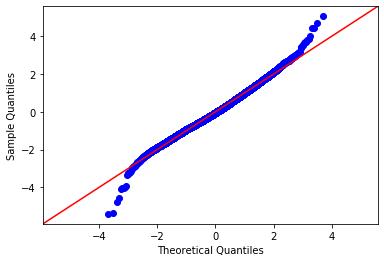

In [483]:
import scipy.stats as stats
IQR_residuals = IQR_model.resid
IQR_fig = sm.graphics.qqplot(IQR_residuals, dist=stats.norm, line='45', fit=True)

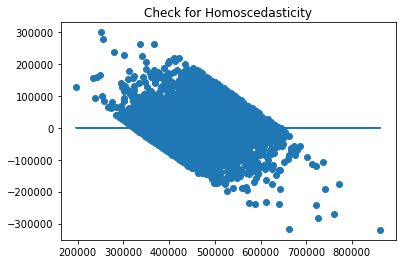

In [484]:
plt.scatter(IQR_model.predict(IQR_train[IQR_x_cols]), IQR_model.resid)
plt.plot(IQR_model.predict(IQR_train[IQR_x_cols]), [0 for i in range(len(IQR_train))])

plt.title('Check for Homoscedasticity');